In [1]:
import matplotlib.pyplot as plt
#import pandas_profiling
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import pandas_profiling

In [2]:
#Import data
df = pd.read_csv('credit.csv')
credit = df
credit.head()

,Unnamed: 0,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [3]:
x = df.iloc[:,0:26]
x.head()

,Unnamed: 0,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [4]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
credit.columns = credit.iloc[0]
credit.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30204 entries, 0 to 30203
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30204 non-null  int64 
 1   ID                          30203 non-null  object
 2   LIMIT_BAL                   30204 non-null  object
 3   SEX                         30204 non-null  object
 4   EDUCATION                   30204 non-null  object
 5   MARRIAGE                    30204 non-null  object
 6   AGE                         30204 non-null  object
 7   PAY_0                       30204 non-null  object
 8   PAY_2                       30204 non-null  object
 9   PAY_3                       30204 non-null  object
 10  PAY_4                       30204 non-null  object
 11  PAY_5                       30204 non-null  object
 12  PAY_6                       30204 non-null  object
 13  BILL_AMT1                   30204 non-null  ob

In [7]:
print(credit.isnull().sum())

0
0                             0
ID                            1
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [8]:
credit[credit['ID'].isnull()]

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
202,202,NaN,X1,X2,X3,X4,X5,X6,X7,X8,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y


In [9]:
credit.dropna(inplace= True)

In [10]:
print(credit.isnull().sum())

0
0                             0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [11]:
credit.drop(credit.index[[0]])

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
2,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,5,5,50000,male,university,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30199,30199,29996,220000,male,high school,1,39,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30200,30200,29997,150000,male,high school,2,43,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30201,30201,29998,30000,male,university,2,37,4,3,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30202,30202,29999,80000,male,high school,1,41,1,-1,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [12]:
print(credit.loc[200:208, :])

0      0   ID  LIMIT_BAL     SEX        EDUCATION  MARRIAGE  AGE  PAY_0  \
200  200  200      30000  female      high school         2   22      1   
201  201  201     180000  female  graduate school         1   38     -2   
203  203   ID  LIMIT_BAL     SEX        EDUCATION  MARRIAGE  AGE  PAY_0   
204  204    1      20000  female       university         1   24      2   
205  205    2     120000  female       university         2   26     -1   
206  206    3      90000  female       university         2   34      0   
207  207    4      50000  female       university         1   37      0   
208  208    5      50000    male       university         1   57     -1   

0    PAY_2  PAY_3  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
200      2      2  ...      29836       1630          0      1000        85   
201     -2     -2  ...          0          0          0         0         0   
203  PAY_2  PAY_3  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
204     

In [13]:
credit.drop(203, inplace=True)

In [14]:
print(credit.loc[200:208, :])

0      0   ID LIMIT_BAL     SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2  \
200  200  200     30000  female      high school        2  22     1     2   
201  201  201    180000  female  graduate school        1  38    -2    -2   
204  204    1     20000  female       university        1  24     2     2   
205  205    2    120000  female       university        2  26    -1     2   
206  206    3     90000  female       university        2  34     0     0   
207  207    4     50000  female       university        1  37     0     0   
208  208    5     50000    male       university        1  57    -1     0   

0   PAY_3  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3  \
200     2  ...     29836      1630         0     1000       85     1714   
201    -2  ...         0         0         0        0        0        0   
204    -1  ...         0         0         0        0      689        0   
205     0  ...      3272      3455      3261        0     1000     1000   
206     

In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30202 entries, 0 to 30203
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30202 non-null  int64 
 1   ID                          30202 non-null  object
 2   LIMIT_BAL                   30202 non-null  object
 3   SEX                         30202 non-null  object
 4   EDUCATION                   30202 non-null  object
 5   MARRIAGE                    30202 non-null  object
 6   AGE                         30202 non-null  object
 7   PAY_0                       30202 non-null  object
 8   PAY_2                       30202 non-null  object
 9   PAY_3                       30202 non-null  object
 10  PAY_4                       30202 non-null  object
 11  PAY_5                       30202 non-null  object
 12  PAY_6                       30202 non-null  object
 13  BILL_AMT1                   30202 non-null  ob

In [16]:
credit.drop(0, inplace=True)
print(credit.loc[0:10, :])

0    0  ID LIMIT_BAL     SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3  \
1    1   1     20000  female       university        1  24     2     2    -1   
2    2   2    120000  female       university        2  26    -1     2     0   
3    3   3     90000  female       university        2  34     0     0     0   
4    4   4     50000  female       university        1  37     0     0     0   
5    5   5     50000    male       university        1  57    -1     0    -1   
6    6   6     50000    male  graduate school        2  37     0     0     0   
7    7   7    500000    male  graduate school        2  29     0     0     0   
8    8   8    100000  female       university        2  23     0    -1    -1   
9    9   9    140000  female      high school        1  28     0     0     2   
10  10  10     20000    male      high school        2  35    -2    -2    -2   

0   ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4  \
1   ...         0         0         0     

In [17]:
credit['ID'] = credit['ID'].astype(int)
credit['ID'].dtypes
credit['LIMIT_BAL'] = credit['LIMIT_BAL'].astype(int)
credit['LIMIT_BAL'].dtypes
credit['MARRIAGE'] = credit['MARRIAGE'].astype(int)
credit['MARRIAGE'].dtypes
credit['AGE'] = credit['AGE'].astype(int)
credit['AGE'].dtypes
credit['PAY_0'] = credit['PAY_0'].astype(int)
credit['PAY_0'].dtypes
credit['PAY_2'] = credit['PAY_2'].astype(int)
credit['PAY_2'].dtypes
credit['PAY_3'] = credit['PAY_3'].astype(int)
credit['PAY_3'].dtypes
credit['PAY_4'] = credit['PAY_4'].astype(int)
credit['PAY_4'].dtypes
credit['PAY_5'] = credit['PAY_5'].astype(int)
credit['PAY_5'].dtypes
credit['PAY_6'] = credit['PAY_6'].astype(int)
credit['PAY_6'].dtypes
credit['BILL_AMT1'] = credit['BILL_AMT1'].astype(int)
credit['BILL_AMT1'].dtypes
credit['BILL_AMT2'] = credit['BILL_AMT2'].astype(int)
credit['BILL_AMT2'].dtypes
credit['BILL_AMT3'] = credit['BILL_AMT3'].astype(int)
credit['BILL_AMT3'].dtypes
credit['BILL_AMT4'] = credit['BILL_AMT4'].astype(int)
credit['BILL_AMT4'].dtypes
credit['BILL_AMT5'] = credit['BILL_AMT5'].astype(int)
credit['BILL_AMT5'].dtypes
credit['BILL_AMT6'] = credit['BILL_AMT6'].astype(int)
credit['BILL_AMT6'].dtypes
credit['PAY_AMT1'] = credit['PAY_AMT1'].astype(int)
credit['PAY_AMT1'].dtypes
credit['PAY_AMT2'] = credit['PAY_AMT2'].astype(int)
credit['PAY_AMT2'].dtypes
credit['PAY_AMT3'] = credit['PAY_AMT3'].astype(int)
credit['PAY_AMT3'].dtypes
credit['PAY_AMT4'] = credit['PAY_AMT4'].astype(int)
credit['PAY_AMT4'].dtypes
credit['PAY_AMT5'] = credit['PAY_AMT5'].astype(int)
credit['PAY_AMT5'].dtypes
credit['PAY_AMT6'] = credit['PAY_AMT6'].astype(int)
credit['PAY_AMT6'].dtypes

dtype('int32')

In [18]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 1 to 30203
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30201 non-null  int64 
 1   ID                          30201 non-null  int32 
 2   LIMIT_BAL                   30201 non-null  int32 
 3   SEX                         30201 non-null  object
 4   EDUCATION                   30201 non-null  object
 5   MARRIAGE                    30201 non-null  int32 
 6   AGE                         30201 non-null  int32 
 7   PAY_0                       30201 non-null  int32 
 8   PAY_2                       30201 non-null  int32 
 9   PAY_3                       30201 non-null  int32 
 10  PAY_4                       30201 non-null  int32 
 11  PAY_5                       30201 non-null  int32 
 12  PAY_6                       30201 non-null  int32 
 13  BILL_AMT1                   30201 non-null  in

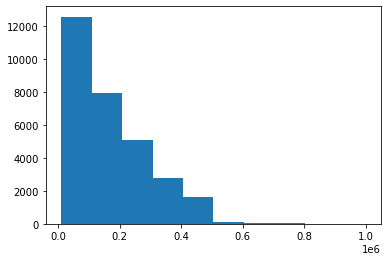

In [19]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

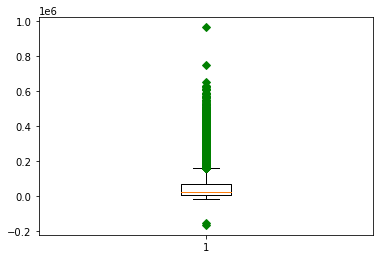

In [20]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [21]:
x = credit['PAY_0']
y = credit['PAY_2']

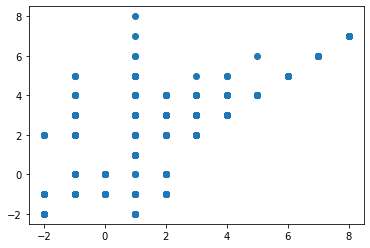

In [22]:
plt.scatter(x,y)
plt.show()

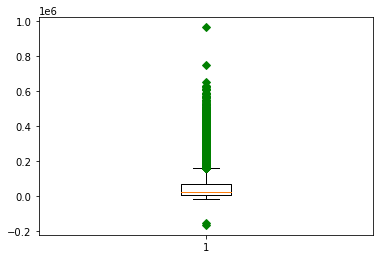

In [23]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [24]:
covMat = credit.cov()
print(covMat)

0                     0            ID     LIMIT_BAL     MARRIAGE  \
0                                                                  
0          7.601128e+07  7.599101e+07  2.916566e+07  -140.070692   
ID         7.599101e+07  7.597102e+07  2.916637e+07  -139.943327   
LIMIT_BAL  2.916566e+07  2.916637e+07  1.684722e+10 -7385.897354   
MARRIAGE  -1.400707e+02 -1.399433e+02 -7.385897e+03     0.272418   
AGE        1.583169e+03  1.581796e+03  1.751674e+05    -1.996406   
PAY_0     -3.021909e+02 -3.021018e+02 -3.955137e+04     0.011963   
PAY_2     -1.119338e+02 -1.119813e+02 -4.610215e+04     0.015264   
PAY_3     -1.965176e+02 -1.964348e+02 -4.441187e+04     0.020343   
PAY_4     -2.414930e+01 -2.419367e+01 -4.052512e+04     0.020355   
PAY_5     -2.240633e+02 -2.239598e+02 -3.665423e+04     0.021200   
PAY_6     -2.022330e+02 -2.022096e+02 -3.511374e+04     0.020740   
BILL_AMT1  1.280025e+07  1.279328e+07  2.728330e+09  -938.872032   
BILL_AMT2  1.134100e+07  1.133656e+07  2.574150e

In [25]:
corrMat = credit.corr()
print(corrMat)

0                 0        ID  LIMIT_BAL  MARRIAGE       AGE     PAY_0  \
0                                                                        
0          1.000000  0.999998   0.025773 -0.030782  0.019691 -0.030848   
ID         0.999998  1.000000   0.025781 -0.030762  0.019679 -0.030847   
LIMIT_BAL  0.025773  0.025781   1.000000 -0.109024  0.146340 -0.271197   
MARRIAGE  -0.030782 -0.030762  -0.109024  1.000000 -0.414769  0.020399   
AGE        0.019691  0.019679   0.146340 -0.414769  1.000000 -0.039523   
PAY_0     -0.030848 -0.030847  -0.271197  0.020399 -0.039523  1.000000   
PAY_2     -0.010721 -0.010728  -0.296601  0.024421 -0.050396  0.671046   
PAY_3     -0.018826 -0.018823  -0.285772  0.032552 -0.053452  0.573129   
PAY_4     -0.002370 -0.002375  -0.267111  0.033364 -0.049858  0.538270   
PAY_5     -0.022675 -0.022670  -0.249155  0.035837 -0.053864  0.508541   
PAY_6     -0.020162 -0.020165  -0.235144  0.034540 -0.048828  0.473786   
BILL_AMT1  0.019941  0.019936   0.2855

In [26]:
header = credit.dtypes.index
print(header)

Index([                           0,                         'ID',
                        'LIMIT_BAL',                        'SEX',
                        'EDUCATION',                   'MARRIAGE',
                              'AGE',                      'PAY_0',
                            'PAY_2',                      'PAY_3',
                            'PAY_4',                      'PAY_5',
                            'PAY_6',                  'BILL_AMT1',
                        'BILL_AMT2',                  'BILL_AMT3',
                        'BILL_AMT4',                  'BILL_AMT5',
                        'BILL_AMT6',                   'PAY_AMT1',
                         'PAY_AMT2',                   'PAY_AMT3',
                         'PAY_AMT4',                   'PAY_AMT5',
                         'PAY_AMT6', 'default payment next month'],
      dtype='object', name=0)


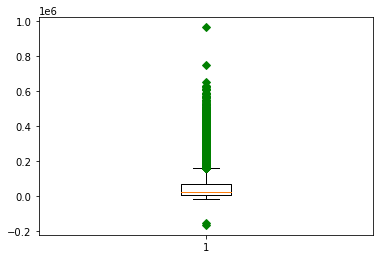

In [27]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [28]:
credit.groupby('default payment next month')['default payment next month'].count()

default payment next month
default         6682
not default    23519
Name: default payment next month, dtype: int64

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


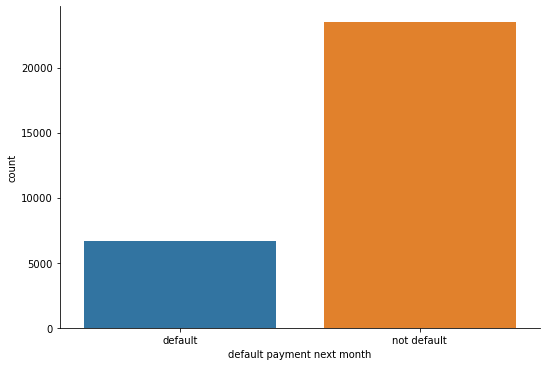

In [29]:
fg = sns.factorplot('default payment next month', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('default payment next month')

In [30]:
credit.groupby('SEX')['SEX'].count()

SEX
female    18217
male      11984
Name: SEX, dtype: int64

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


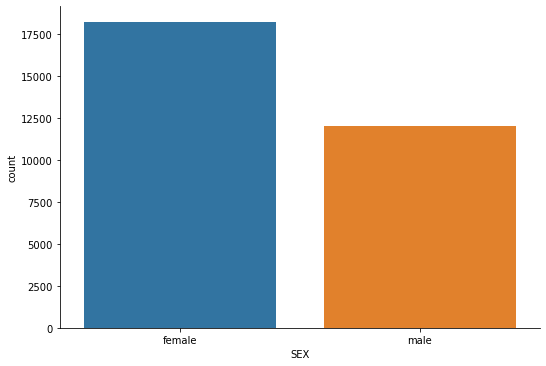

In [31]:
fg = sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('SEX')

In [32]:
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
graduate school    10672
high school         4952
other                470
university         14107
Name: EDUCATION, dtype: int64

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


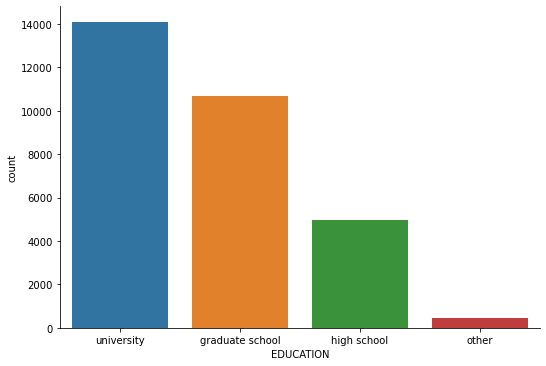

In [33]:
fg = sns.factorplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('EDUCATION')

In [34]:
credit.groupby('LIMIT_BAL')['LIMIT_BAL'].count()

LIMIT_BAL
10000       495
16000         2
20000      1992
30000      1617
40000       231
           ... 
750000        4
760000        1
780000        2
800000        2
1000000       1
Name: LIMIT_BAL, Length: 81, dtype: int64

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


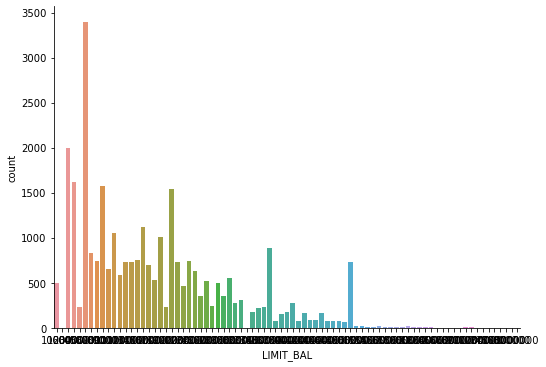

In [35]:
fg = sns.factorplot('LIMIT_BAL', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('LIMIT_BAL')

In [36]:
credit.groupby(['default payment next month','AGE'])['default payment next month'].count()

default payment next month  AGE
default                     21      14
                            22     173
                            23     247
                            24     306
                            25     303
                                  ... 
not default                 72       2
                            73       1
                            74       1
                            75       2
                            79       1
Name: default payment next month, Length: 109, dtype: int64

<AxesSubplot:>

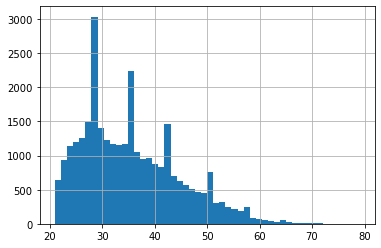

In [37]:
credit['AGE'].hist(bins=50)

In [38]:
credit.groupby('default payment next month')['ID'].count()

default payment next month
default         6682
not default    23519
Name: ID, dtype: int64

In [39]:
credit.groupby(['default payment next month','PAY_3','PAY_4','PAY_5'])['ID'].count()

default payment next month  PAY_3  PAY_4  PAY_5
default                     -2     -2     -2       655
                                          -1        40
                                   -1     -1        36
                                           0        20
                                           2        13
                                                  ... 
not default                  6      5      4         8
                                    6      5         1
                             7      6      5         1
                                    7      7         4
                             8      7      7         1
Name: ID, Length: 178, dtype: int64

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


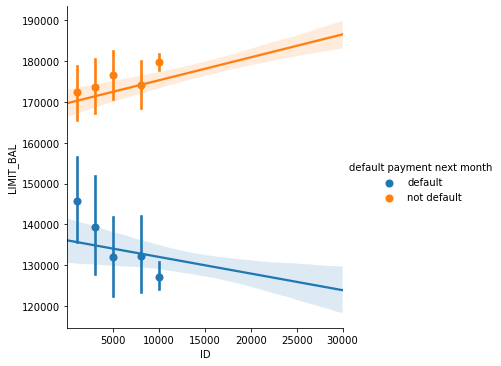

In [40]:
Limit = [1000,3000,5000,8000,10000]
sns.lmplot('ID','LIMIT_BAL',hue='default payment next month',data=credit,x_bins=Limit, hue_order=['default','not default'])

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


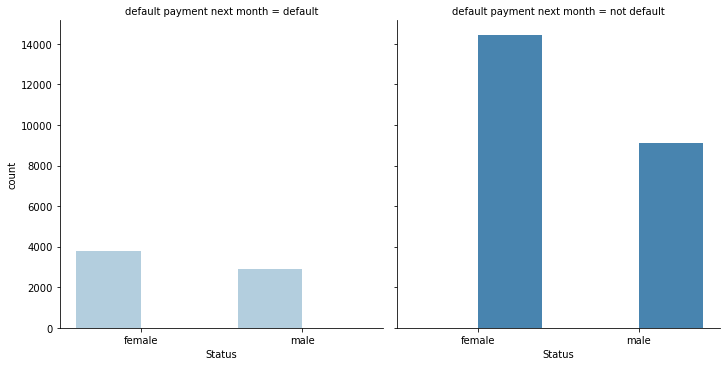

In [55]:
fg=sns.factorplot('SEX', data=credit, kind='count', hue='default payment next month', col='default payment next month', hue_order=['default','not default'],
                 palette='Blues')
fg.set_xlabels('Status')

In [42]:
credit.groupby('MARRIAGE')['ID'].count()

MARRIAGE
0       54
1    13733
2    16088
3      326
Name: ID, dtype: int64

In [43]:
bins = [21,35,45,55,65,75]
credit.groupby('AGE')['AGE'].count()

AGE
21      67
22     573
23     940
24    1139
25    1192
26    1263
27    1488
28    1414
29    1619
30    1406
31    1221
32    1167
33    1151
34    1176
35    1120
36    1111
37    1050
38     949
39     958
40     873
41     830
42     795
43     672
44     703
45     621
46     574
47     507
48     467
49     456
50     412
51     344
52     306
53     326
54     248
55     210
56     181
57     125
58     123
59      83
60      68
61      56
62      44
63      32
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

In [44]:
#Age discretization
AGE_category = ['21', '30', '40', '50', '60', '70', '80']
AGE_cut_bins = [0, 21, 30, 40, 50, 60, 70, 90]
credit['age_group'] = pd.cut(credit['AGE'], bins=AGE_cut_bins, labels=AGE_category)
credit.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_group
1,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,689,0,0,0,0,default,30
2,2,2,120000,female,university,2,26,-1,2,0,...,3455,3261,0,1000,1000,1000,0,2000,default,30
3,3,3,90000,female,university,2,34,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,40
4,4,4,50000,female,university,1,37,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,40
5,5,5,50000,male,university,1,57,-1,0,-1,...,19146,19131,2000,36681,10000,9000,689,679,not default,60


In [45]:
credit.groupby('age_group')['ID'].count()

age_group
21       67
30    11034
40    10776
50     6037
60     2014
70      258
80       15
Name: ID, dtype: int64

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


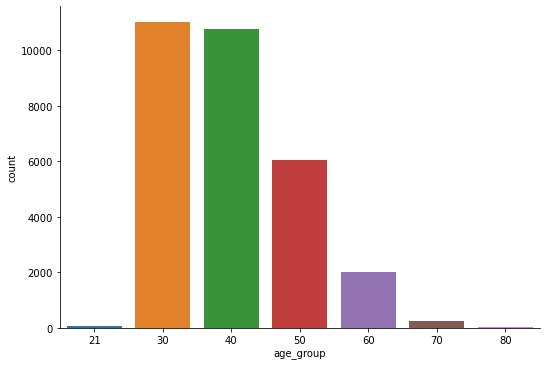

In [46]:
fg = sns.factorplot('age_group', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('age_group')

In [47]:
credit.groupby(['default payment next month','SEX'])['ID'].count()

default payment next month  SEX   
default                     female     3786
                            male       2896
not default                 female    14431
                            male       9088
Name: ID, dtype: int64

In [60]:
credit.groupby(['default payment next month','EDUCATION'])['ID'].count()

default payment next month  EDUCATION      
default                     graduate school     2053
                            high school         1247
                            other                 34
                            university          3348
not default                 graduate school     8619
                            high school         3705
                            other                436
                            university         10759
Name: ID, dtype: int64

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


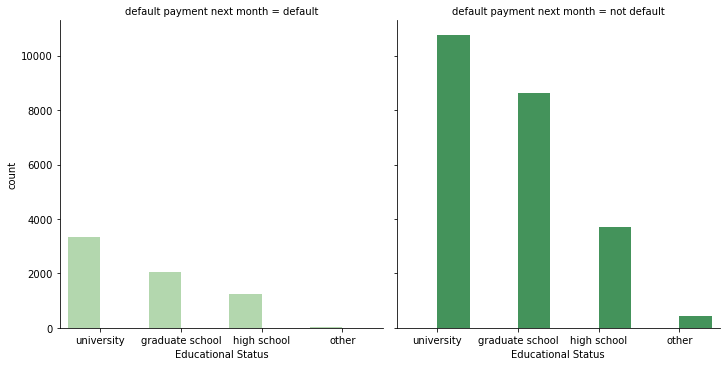

In [59]:
fg=sns.factorplot('EDUCATION', data=credit, kind='count', hue='default payment next month', col='default payment next month', hue_order=['default','not default'],
                 palette='Greens')
fg.set_xlabels('Educational Status')

In [61]:
credit.groupby(['default payment next month','age_group'])['ID'].count()

default payment next month  age_group
default                     21             14
                            30           2480
                            40           2198
                            50           1407
                            60            510
                            70             68
                            80              5
not default                 21             53
                            30           8554
                            40           8578
                            50           4630
                            60           1504
                            70            190
                            80             10
Name: ID, dtype: int64

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


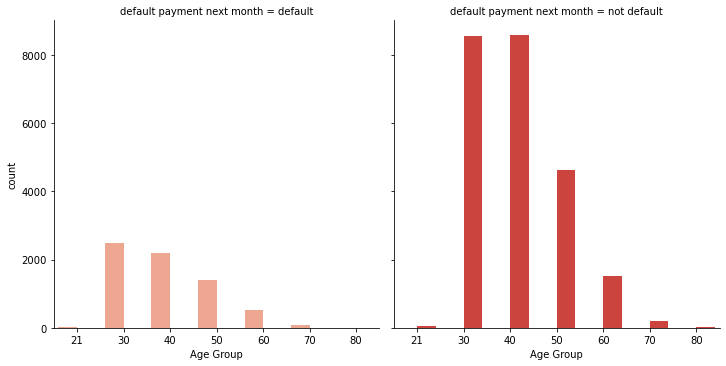

In [63]:
fg=sns.factorplot('age_group', data=credit, kind='count', hue='default payment next month', col='default payment next month', hue_order=['default','not default'],
                 palette='Reds')
fg.set_xlabels('Age Group')

In [70]:
credit.groupby(['default payment next month','MARRIAGE'])['ID'].count()

default payment next month  MARRIAGE
default                     0               5
                            1            3225
                            2            3368
                            3              84
not default                 0              49
                            1           10508
                            2           12720
                            3             242
Name: ID, dtype: int64

C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ameha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


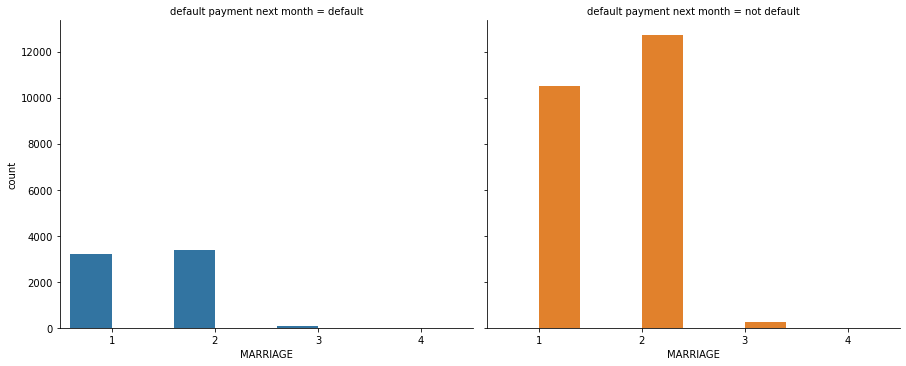

In [71]:
sns.factorplot('MARRIAGE', data=credit, kind='count', hue='default payment next month', col='default payment next month', order=[1,2,3,4], 
               hue_order=['default','not default'], aspect=1.25, size=5)